In [235]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Далее будет рассматриваться трапециевидное распределение

Информация по распределнию (взято из scipy.stats):

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.trapz.html#scipy.stats.trapz

In [236]:
trapz = st.trapz(0.3, 0.7) #построим "замороженное" распределние
sample = trapz.rvs(size=1000) #возьмем выборку объёма 1000
mean, var = trapz.stats(moments='mv') #посчитаем среднее значение и дисперсию
print('Mean = {}, Variance = {}'.format(mean, var))

Mean = 0.5, Variance = 0.04833333357227776


In [237]:
def hist(n, bins, patches): #ф-я для отрисовки разноцветной гистограммы
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))

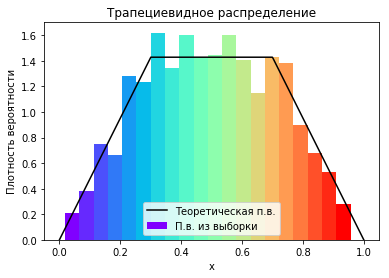

In [238]:
cm = plt.cm.get_cmap('rainbow')
x = np.linspace(0, 1, 1000)
plt.plot(x, trapz.pdf(x), color='black', label='Теоретическая п.в.')
n, bins, patches = plt.hist(sample, bins=20, normed=True, label='П.в. из выборки')
hist(n, bins, patches)
plt.legend(loc='best')
plt.title('Трапециевидное распределение')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.show()

In [239]:
def dist(n):#ф-я создания выборочных средних для 1000 выборок объема n
    means = np.zeros(1000)
    for i in range(1000):
        means[i] = np.array((st.trapz.rvs(0.3, 0.7, size=n)).mean())
    return means

In [242]:
a, b, c, d = 0.0, 0.3, 0.7, 1.0 
r = c - a
s = d - c
t = b - d
Ex = np.divide((b**2 - a**2 + d**2 - c**2 - a*c + b*d), 3.0 * (b - a + d - c))
Var = np.divide((6.0*s**4 + 12.0*s**3*(r+t) + s**2*(12.0*(r+t)**2 - 6.0*r*t)), 18.0 * (r + 2.0 * s + t)**2) 

Можно было так же использовать значения .stats для среднего и дисперсии

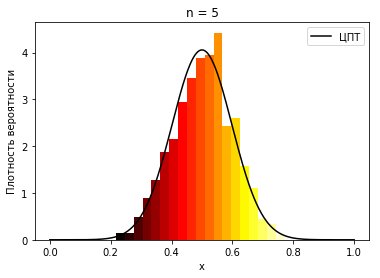

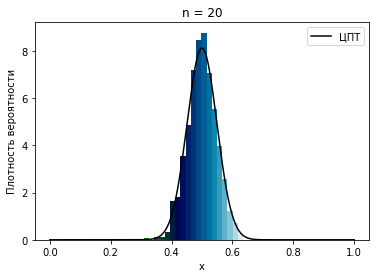

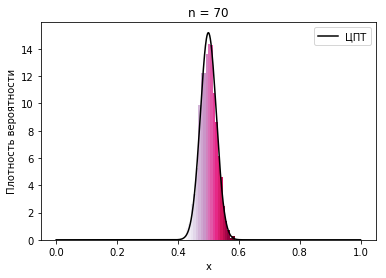

In [249]:
n = [5, 20, 70]
x = np.linspace(0, 1, 1000)
colours = ['hot', 'ocean', 'PuRd']
for i in range(len(n)):#построение гитограмм для выборочных средних при трех разных n
    norm_dist = st.norm(Ex, np.sqrt(Var/n[i]))#построение норм.распр. по ЦПТ
    cm = plt.cm.get_cmap(colours[i])
    plt.plot(x, norm_dist.pdf(x), color='black', label='ЦПТ')#плотность норм. распр.
    m, bins, patches = plt.hist(dist(n[i]), bins=20, normed=True)
    hist(m, bins, patches)
    plt.legend(loc='best')
    #plt.axis([0.25, 0.75, 0, 15])
    plt.title('n = {}'.format(n[i]))
    plt.xlabel('x')
    plt.ylabel('Плотность вероятности')
    plt.show()

## Вывод
Нормальное распределение неплохо апроксимирует трапециевидное распр. даже на маленьких n, но это объяснимо симметричностью и св-ми трап. распр. В общем, ЦПТ работает для высоких n для описания распределения выборочных средних.